## Part II - Let's Invistigate the Prosper Loans world </br>
##  by Siwar Sahraoui

**Investigation Overview**</br>
In this investigation , I wanted to learn about the feature that affects the Prosper Score of each loan, so we will try to do some vizualsations in order to dicover features that affect this score

**Dataset Overview**</br>
This set of data includes 113 937 loans with 81 characteristics for each loan , such as the amount of the loan, the interest rate, its current status, the borrower's income, and many others. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loans=pd.read_csv('prosperLoanData.csv')

In [3]:
## Subset the dataframe by selecting features of interest
cols = ['ProsperScore','BorrowerAPR', 'ListingCategory (numeric)' ,'BorrowerState', 'Occupation', 'EmploymentStatus' ,'EmploymentStatusDuration' ,'IsBorrowerHomeowner', 'LoanOriginalAmount' ,'BorrowerRate','StatedMonthlyIncome' ,'Term' ,'ProsperRating (Alpha)']
loan_sub = df_loans[cols]
loan_sub.head()

,ProsperScore,BorrowerAPR,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,LoanOriginalAmount,BorrowerRate,StatedMonthlyIncome,Term,ProsperRating (Alpha)
0,NaN,0.16516,0,CO,Other,Self-employed,2.0,True,9425,0.1580,3083.333333,36,NaN
1,7.0,0.12016,2,CO,Professional,Employed,44.0,False,10000,0.0920,6125.000000,36,A
2,NaN,0.28269,0,GA,Other,Not available,NaN,False,3001,0.2750,2083.333333,36,NaN
3,9.0,0.12528,16,GA,Skilled Labor,Employed,113.0,True,10000,0.0974,2875.000000,36,A
4,4.0,0.24614,2,MN,Executive,Employed,44.0,True,15000,0.2085,9583.333333,36,D


Note that the above cells have been set as "Skip"-type slides. That means that when the notebook is rendered as http slides, those cells won't show up.

**Prosper Score distribution**</br>
First of all , let's vizualise **how the ProsperScore are distribited in our Dataframe ?**

Text(0.5, 1.0, 'Prosper Score distribution')

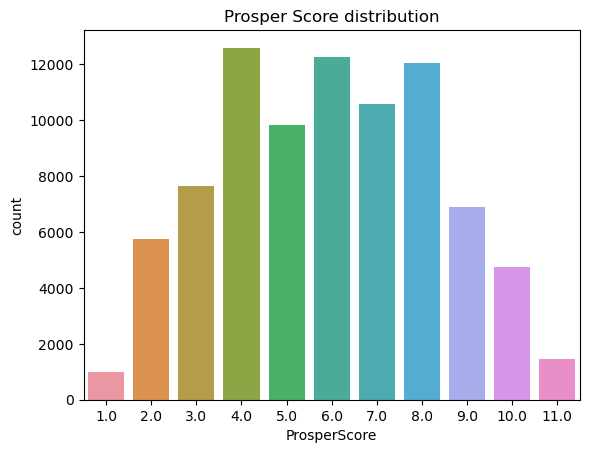

In [4]:
# vizualiaze the distribution of ProsperScore
ax= sb.countplot(data=loan_sub, x='ProsperScore');
ax.set_title("Prosper Score distribution") 

In our dataset the majority of rows have as a ProsperScore between 4.0 and 8.0

**Why does people need Prosper loans ?**</br>
Let's vizualise the distrubtion of Listing categry so we will respond to the question why does people need loans ?

Text(0.5, 0, 'Loans Categories distribution')

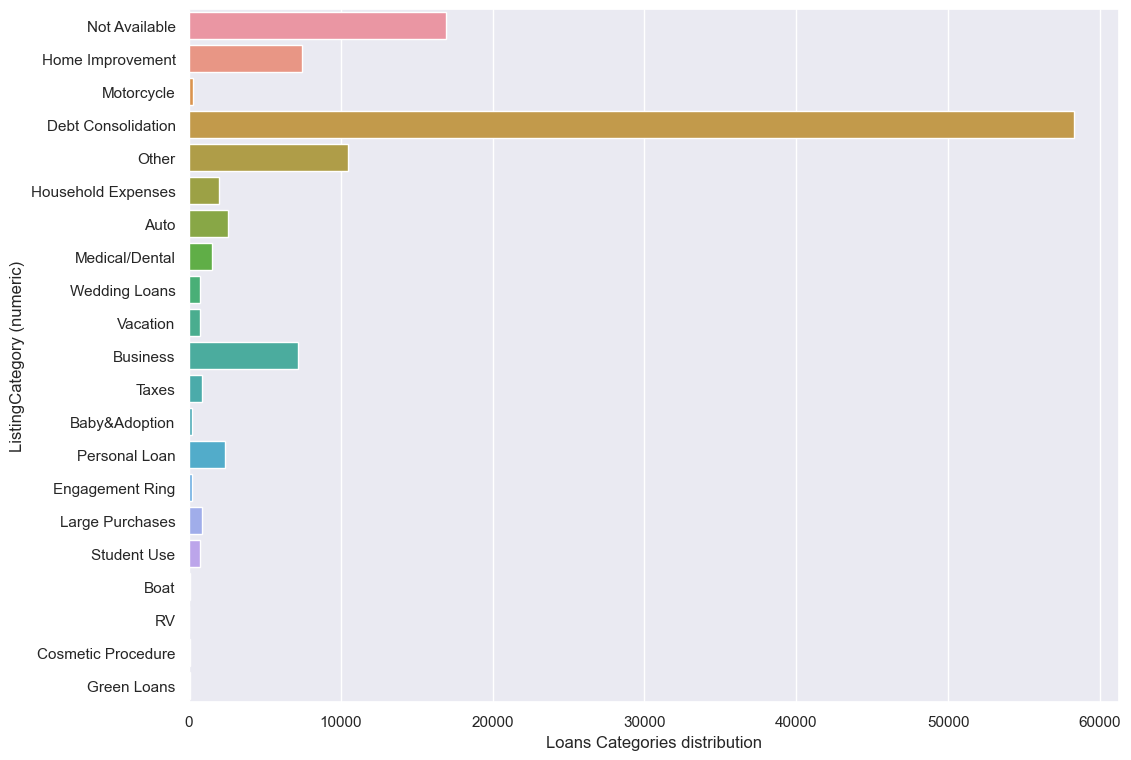

In [5]:
#first of all we need to repalce the numeric value of Listing categroty with what correspond to each value in order to make our exploration more understandable
loan_sub['ListingCategory (numeric)']= loan_sub['ListingCategory (numeric)'].replace(

{
 0: 'Not Available',1: 'Debt Consolidation', 2:'Home Improvement',
  3:'Business',4: 'Personal Loan', 5: 'Student Use', 
 6: 'Auto', 7:'Other', 8 :'Baby&Adoption', 9 :'Boat',
 10:'Cosmetic Procedure', 11 :'Engagement Ring', 12: 'Green Loans',
 13 :'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental',
  16: 'Motorcycle', 17 :'RV', 18 : 'Taxes', 19:'Vacation', 20: 'Wedding Loans'}

)
sb.set(rc={'figure.figsize':(12,9)})
sb.countplot(data = loan_sub, y = 'ListingCategory (numeric)') 
plt.xlabel('Loans Categories distribution')

the Prosper loans are used mainly in Debt Consolidation

sb.set(rc={'figure.figsize':(12,9)})
sb.countplot(data = loan_sub[loan_sub.ProsperScore>=5.0], y = 'ListingCategory (numeric)') 
plt.xlabel('Loans with Good ProsperScore Categories distribution')

**Corrolation between numeric values**</br>
we notice that the ProsperScore is affected with too many features , so to be sure of the numeric values that affect the prosperScore we will plot the Corrlation matrix

Text(0.5, 1.0, 'loan sub corrolation')

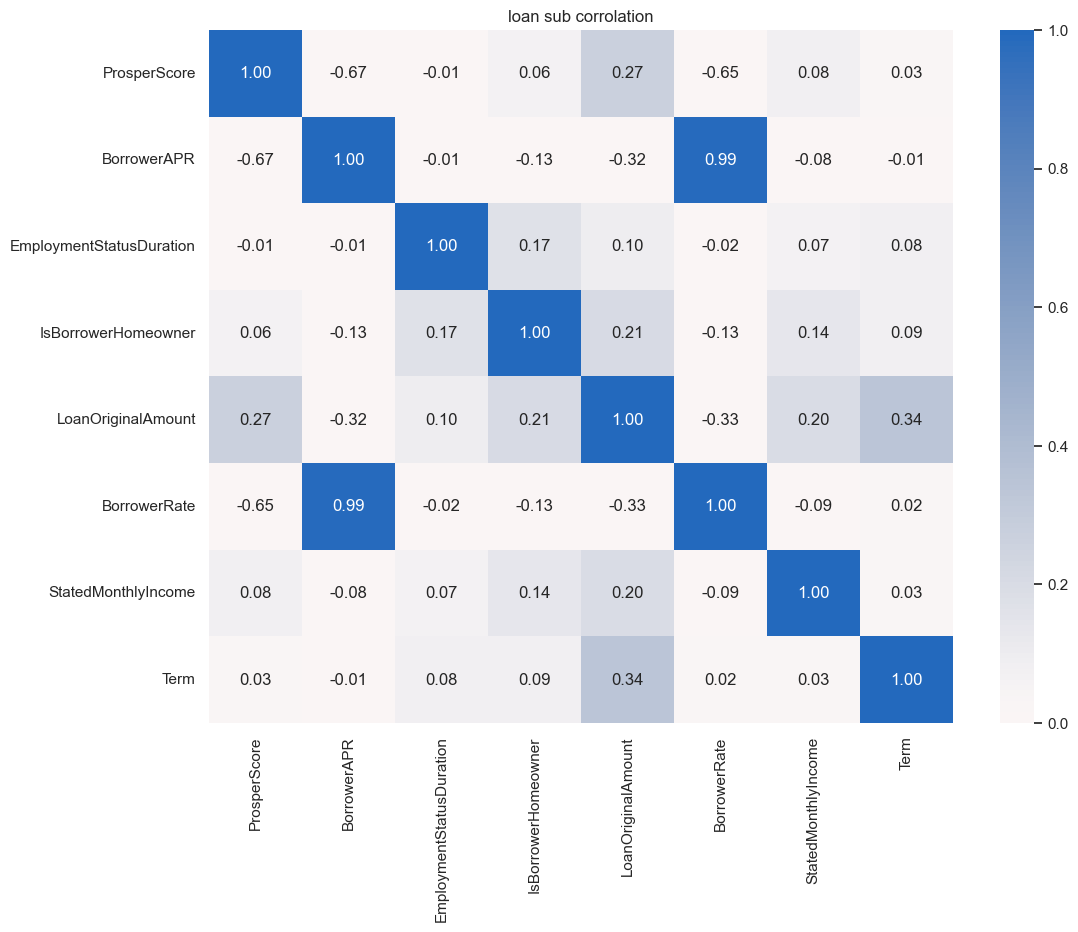

In [6]:
sb.heatmap(loan_sub.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0, vmin=0) 
plt.title('loan sub corrolation')

**Strong corlleation between**</br>

BorrowerAPR and BorrowerRate</br>
loanOriginalAmount and Term

**Generate Slideshow**</br>
Once you're ready to generate your slideshow, use the jupyter nbconvert command to generate the HTML slide show.

In [9]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 812771 bytes to Part_II_slide_deck_template.slides.html


In the classroom workspace, the generated HTML slideshow will be placed in the home folder.</br>

In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel.</br>

**Submission**</br>
If you are using classroom workspace, you can choose from the following two ways of submission:</br>

Submit from the workspace. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:</br>
Part_I_notebook.ipynb</br>
Part_I_notebook.html or pdf</br>
Part_II_notebook.ipynb</br>
Part_I_slides.html</br>
README.md</br>
dataset (optional)</br>
Submit a zip file on the last page of this project lesson. In this case, open the Jupyter terminal and run the command below to generate a ZIP file.</br>
zip -r my_project.zip .</br>
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.</br>